<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2006%20%3A%20Recurrent%20Neural%20Networks%2C%20Time%20Series%20and%20Sequence%20Data/05_simple_rnn_model_on_noise_sine_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SIMPLE RNN MODEL**

STEPS 

1. Load the Data.
2. Build the Model.
3. Train the Model.
4. Evaluate the Model.
5. Make Predictions.

IMPORT LIBRARIES

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

LOAD THE DATA

+ From a Sine Wave (with and without noise) we will create a Supervised Learning Dataset.
+ Input Sequence of length T.
+ Target :- Output next values.
+ Count from t=0, to len(series) - T
+ Since the final target should be at len(series) - T.
+ Linear Regression expects 2D input (NxT)
+ In RNN expects 3D input (NxTx1)

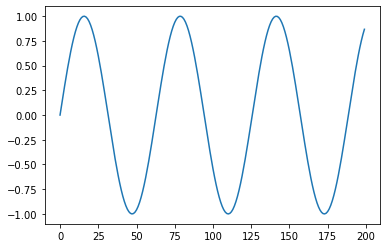

In [4]:
## make the synthetic data, very basic time series, a sine wave without noise
series = np.sin(0.1 * np.arange(200))
## plot the series
plt.plot(series)
plt.show()

In [6]:
## build the dataset.
## lets see if we can use T past values to predict the next values.
T = 10
D = 1
X = []
Y = []

## loop over the range of len of series.
## and populate the X and Y.
for t in range(len(series) - T):
  #print(t)  ## 0 to 190
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1)  ## now the data should be NxTxD
Y = np.array(Y)
N = len(X)
print("X Shape : ", X.shape, "Y Shape : ", Y.shape)

X Shape :  (190, 10, 1) Y Shape :  (190,)


BUILD THE RNN MODEL

In [13]:
i = Input(shape = (T,1))
x = SimpleRNN(5)(i)  ## defalt activation is "tanh"
x = Dense(1)(x)
model = Model(i, x)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [14]:
## compile the model
model.compile(
    loss = "mse",
    optimizer = Adam(learning_rate=0.1)
)

In [ ]:
## train the model
r = model.fit(X[:-N//2], Y[:-N//2], epochs = 100, validation_data = (X[-N//2:], Y[-N//2:]))

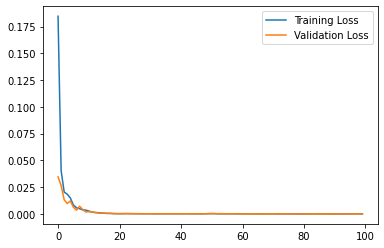

In [16]:
## plotting the loss
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show()

DOING THE ONE STEP FORECAST

1/1 [==============================] - 0s 36ms/step


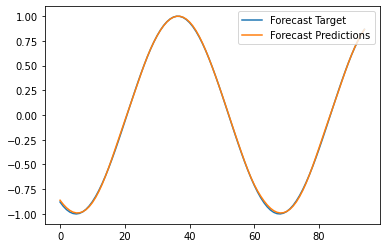

In [17]:
## wrong forecast using the true targets.
validation_target = Y[-N//2:]
# print(len(validation_target))
validation_predictions = []  ## empty list need to be appended after making the predictions.

## index of the first validation input
i = -N//2
# print(i)

## looping through the while loop
while len(validation_predictions) < len(validation_target):
  ## predict the model
  p = model.predict(X[i].reshape(1,-1))[0,0]
  # print(p)
  i += 1

  ## update the prediction list
  validation_predictions.append(p)

## plot the figure using the target and predictions.
plt.plot(validation_target, label = "Forecast Target")
plt.plot(validation_predictions, label = "Forecast Predictions")
plt.legend();
plt.show()

REAL FORECAST



1/1 [==============================] - 0s 27ms/step


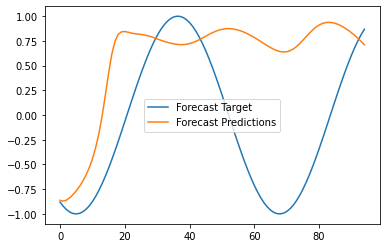

In [18]:
## forecast future values only using the self predictions for making the future predictions.
validation_target = Y[-N//2:]
# print(len(validation_target))
validation_predictions = []  ## empty list need to be appended after making the predictions.

## last train input
last_x = X[-N//2]  ## 1D array of length T

## looping through the while loop
while len(validation_predictions) < len(validation_target):
  ## predict the model
  p = model.predict(last_x.reshape(1,-1))[0,0]

  ## update the prediction list
  validation_predictions.append(p)

  ## make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

## plot the figure using the target and predictions.
plt.plot(validation_target, label = "Forecast Target")
plt.plot(validation_predictions, label = "Forecast Predictions")
plt.legend();
plt.show()


Here by using the RNN, it is not working as a Perfect Linear Regression Model as we saw Earlier.

+ "relu" is much better than "tanh".

ADD NOISE AND RUN THE NOTEBOOK BELOW AGAIN.

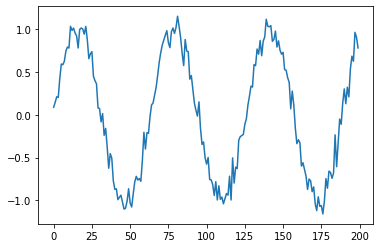

In [19]:
## make the synthetic data, very basic time series, a sine wave with noise
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1
## plot the series
plt.plot(series)
plt.show()

In [20]:
## build the dataset.
## lets see if we can use T past values to predict the next values.
T = 10
D = 1
X = []
Y = []

## loop over the range of len of series.
## and populate the X and Y.
for t in range(len(series) - T):
  #print(t)  ## 0 to 190
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1)  ## now the data should be NxTxD
Y = np.array(Y)
N = len(X)
print("X Shape : ", X.shape, "Y Shape : ", Y.shape)

X Shape :  (190, 10, 1) Y Shape :  (190,)


In [21]:
i = Input(shape = (T,1))
x = SimpleRNN(5)(i)  ## defalt activation is "tanh"
x = Dense(1)(x)
model = Model(i, x)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [22]:
## compile the model
model.compile(
    loss = "mse",
    optimizer = Adam(learning_rate=0.1)
)

## train the model
r = model.fit(X[:-N//2], Y[:-N//2], epochs = 100, validation_data = (X[-N//2:], Y[-N//2:]))

Epoch 1/100
3/3 [==============================] - 1s 143ms/step - loss: 1.0283 - val_loss: 0.0622
Epoch 2/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0652 - val_loss: 0.0778
Epoch 3/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0627 - val_loss: 0.0587
Epoch 4/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0607 - val_loss: 0.0491
Epoch 5/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0345 - val_loss: 0.0428
Epoch 6/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0392 - val_loss: 0.0496
Epoch 7/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0420 - val_loss: 0.0309
Epoch 8/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0224 - val_loss: 0.0306
Epoch 9/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0301 - val_loss: 0.0307
Epoch 10/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0234 - val_loss: 0.0244
Epoch 11/100
3/3 [

1/1 [==============================] - 0s 24ms/step


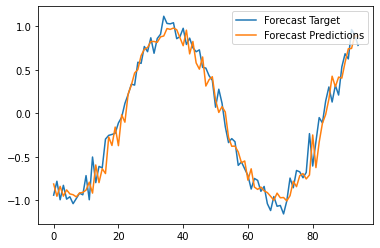

In [23]:
## wrong forecast using the true targets.
validation_target = Y[-N//2:]
# print(len(validation_target))
validation_predictions = []  ## empty list need to be appended after making the predictions.

## index of the first validation input
i = -N//2
# print(i)

## looping through the while loop
while len(validation_predictions) < len(validation_target):
  ## predict the model
  p = model.predict(X[i].reshape(1,-1))[0,0]
  # print(p)
  i += 1

  ## update the prediction list
  validation_predictions.append(p)

## plot the figure using the target and predictions.
plt.plot(validation_target, label = "Forecast Target")
plt.plot(validation_predictions, label = "Forecast Predictions")
plt.legend();
plt.show()

1/1 [==============================] - 0s 24ms/step


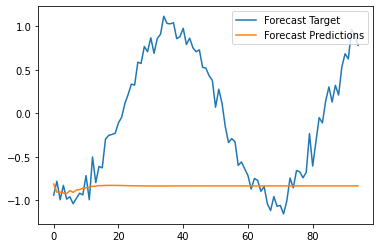

In [24]:
## forecast future values only using the self predictions for making the future predictions.
validation_target = Y[-N//2:]
# print(len(validation_target))
validation_predictions = []  ## empty list need to be appended after making the predictions.

## last train input
last_x = X[-N//2]  ## 1D array of length T

## looping through the while loop
while len(validation_predictions) < len(validation_target):
  ## predict the model
  p = model.predict(last_x.reshape(1,-1))[0,0]

  ## update the prediction list
  validation_predictions.append(p)

  ## make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

## plot the figure using the target and predictions.
plt.plot(validation_target, label = "Forecast Target")
plt.plot(validation_predictions, label = "Forecast Predictions")
plt.legend();
plt.show()


Here the Situation is the value is repeating.
So we don't have a generalized Output. Using any of the Activation Function available.